![dance party](dance_party.jpg)

# Which songs are most suitable for a dancing party?

## 📖 Background
It's that vibrant time of year again - Summer has arrived (for those of us in the Northern Hemisphere at least)! There's an energy in the air that inspires us to get up and move. In sync with this exuberance, your company has decided to host a dance party to celebrate. And you, with your unique blend of creativity and analytical expertise, have been entrusted with the crucial task of curating a dance-themed playlist that will set the perfect mood for this electrifying night. The question then arises - How can you identify the songs that would make the attendees dance their hearts out? This is where your coding skills come into play.

## Executive summary


## 💾 The Data
You have assembled information on more than `125` genres of Spotify music tracks in a file called `spotify.csv`, with each genre containing approximately `1000` tracks. All tracks, from all time, have been taken into account without any time period limitations. However, the data collection was concluded in `October 2022`.
Each row represents a track that has some audio features associated with it.

| Column     | Description              |
|------------|--------------------------|
| `track_id` | The Spotify ID number of the track. |
| `artists` | Names of the artists who performed the track, separated by a `;` if there's more than one.|
| `album_name` | The name of the album that includes the track.|
| `track_name` | The name of the track.|
| `popularity` | Numerical value ranges from `0` to `100`, with `100` being the highest popularity. This is calculated based on the number of times the track has been played recently, with more recent plays contributing more to the score. Duplicate tracks are scored independently.|
| `duration_ms` | The length of the track, measured in milliseconds.|
| `explicit` | Indicates whether the track contains explicit lyrics. `true` means it does, `false` means it does not or it's unknown.|
| `danceability` | A score ranges between `0.0` and `1.0` that represents the track's suitability for dancing. This is calculated by algorithm and is determined by factors like tempo, rhythm stability, beat strength, and regularity.|
| `energy` | A score ranges between `0.0` and `1.0` indicating the track's intensity and activity level. Energetic tracks tend to be fast, loud, and noisy.|
| `key` | The key the track is in. Integers map to pitches using standard Pitch class notation. E.g.`0 = C`, `1 = C♯/D♭`, `2 = D`, and so on. If no key was detected, the value is `-1`.| 
| `loudness` | The overall loudness, measured in decibels (dB).|
| `mode` |  The modality of a track, represented as `1` for major and `0` for minor.| 
| `speechiness` | Measures the amount of spoken words in a track. A value close to `1.0` denotes speech-based content, while `0.33` to `0.66` indicates a mix of speech and music like rap. Values below `0.33` are usually music and non-speech tracks.| 
| `acousticness` | A confidence measure ranges from `0.0` to `1.0`, with `1.0` representing the highest confidence that the track is acoustic.|
| `instrumentalness` | Instrumentalness estimates the likelihood of a track being instrumental. Non-lyrical sounds such as "ooh" and "aah" are considered instrumental, whereas rap or spoken word tracks are classified as "vocal". A value closer to `1.0` indicates a higher probability that the track lacks vocal content.|
| `liveness` | A measure of the probability that the track was performed live. Scores above `0.8` indicate a high likelihood of the track being live.|
| `valence` | A score from `0.0` to `1.0` representing the track's positiveness. High scores suggest a more positive or happier track.|
| `tempo` | The track's estimated tempo, measured in beats per minute (BPM).|
| `time_signature` | An estimate of the track's time signature (meter), which is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from `3` to `7` indicating time signatures of `3/4`, to `7/4`.|
| `track_genre` |  The genre of the track.|

[Source](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset) (data has been modified)

## 💪 Challenge
Your task is to devise an analytically-backed, dance-themed playlist for the company's summer party. Your choices must be justified with a comprehensive report explaining your methodology and reasoning. Below are some suggestions on how you might want to start curating the playlist:
* Use descriptive statistics and data visualization techniques to explore the audio features and understand their relationships.
* Develop and apply a machine learning model that predicts a song's `danceability`. 
* Interpret the model outcomes and utilize your data-driven insights to curate your ultimate dance party playlist of the top 50 songs according to your model.

In [135]:
# Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import plotly.express as px
import missingno as msno

In [136]:
spotify = pd.read_csv('data/spotify.csv')
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [137]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113027 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113027 non-null  object 
 1   artists           113026 non-null  object 
 2   album_name        113026 non-null  object 
 3   track_name        113026 non-null  object 
 4   popularity        113027 non-null  int64  
 5   duration_ms       113027 non-null  float64
 6   explicit          113027 non-null  bool   
 7   danceability      113027 non-null  float64
 8   energy            113027 non-null  float64
 9   key               113027 non-null  int64  
 10  loudness          113027 non-null  float64
 11  mode              113027 non-null  int64  
 12  speechiness       113027 non-null  float64
 13  acousticness      113027 non-null  float64
 14  instrumentalness  113027 non-null  float64
 15  liveness          113027 non-null  float64
 16  valence           11

In [138]:
#Drop NaN values from the spotify dataset
spotify.dropna(inplace=True)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113026 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113026 non-null  object 
 1   artists           113026 non-null  object 
 2   album_name        113026 non-null  object 
 3   track_name        113026 non-null  object 
 4   popularity        113026 non-null  int64  
 5   duration_ms       113026 non-null  float64
 6   explicit          113026 non-null  bool   
 7   danceability      113026 non-null  float64
 8   energy            113026 non-null  float64
 9   key               113026 non-null  int64  
 10  loudness          113026 non-null  float64
 11  mode              113026 non-null  int64  
 12  speechiness       113026 non-null  float64
 13  acousticness      113026 non-null  float64
 14  instrumentalness  113026 non-null  float64
 15  liveness          113026 non-null  float64
 16  valence           11

<AxesSubplot: >

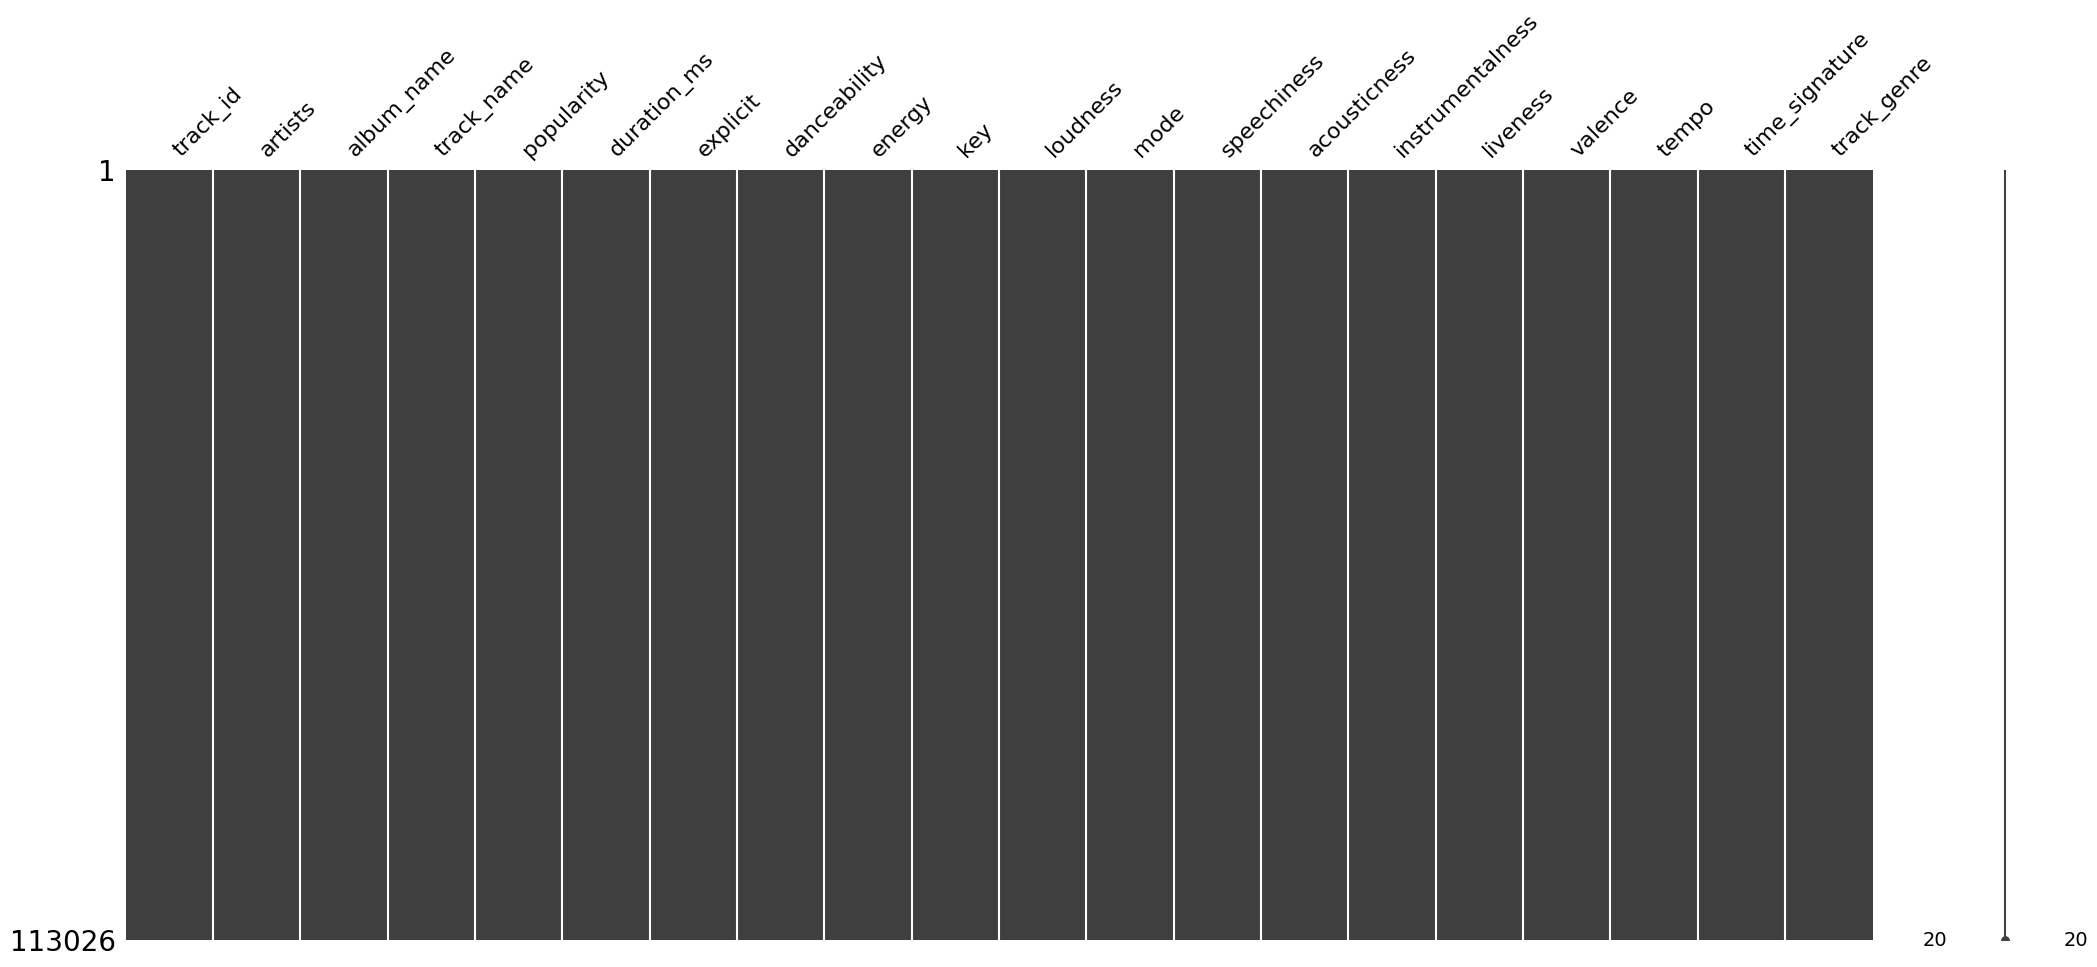

In [139]:
#Search for missing data
msno.matrix(spotify)

## Track id and Track name
After reviewing that there was no missing values, we find out that some of the songs have duplicates, more in detail by their genre and also the track name appears to have dupplicates. So now we will be dropin the duplicates and only conserve the last entry of both variables

In [140]:
# Find duplicates by track_id
spotify_duplicates = spotify[spotify.duplicated(subset=['track_id'], keep=False)].sort_values('track_id')
spotify_duplicates.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
14908,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320.0,False,0.613,0.471,1,-6.644,0,0.1070,0.31600,0.000001,0.1170,0.406,143.064,4,chill
102298,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320.0,False,0.613,0.471,1,-6.644,0,0.1070,0.31600,0.000001,0.1170,0.406,143.064,4,soul
2092,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973.0,False,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033,4,alt-rock
3242,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973.0,False,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033,4,alternative
91020,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973.0,False,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033,4,rock


In [141]:
# Drop duplicates and keep the first one
spotify.drop_duplicates(subset='track_id', keep='last', inplace=True)
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.210,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.905,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.469,0.000000,0.0829,0.167,119.949,4,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613.0,False,0.625,0.4140,0,-8.700,1,0.0369,0.294,0.000000,0.1510,0.669,130.088,4,acoustic
10,4mzP5mHkRvGxdhdGdAH7EJ,Zack Tabudlo,Episode,Give Me Your Forever,74,244800.0,False,0.627,0.3630,8,-8.127,1,0.0291,0.279,0.000000,0.0928,0.301,99.905,4,acoustic


In [142]:
# Find duplicates by track_name
spotify_duplicates = spotify[spotify.duplicated(subset='track_name', keep=False)].sort_values('track_name')
spotify_duplicates.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
110443,03XMXPAE2Yx6HeqCpAPL5o,Kid Koala,Baby Driver (Music from the Motion Picture),"""Was He Slow?"" - Music From The Motion Picture...",25,106880.0,False,0.754,0.719,10,-5.806,0,0.3710,0.3730,0.259000,0.1200,0.674,175.990,4,trip-hop
110356,1Ffxfl1vuEDc0xBVPIQ50s,Kid Koala,"""Was He Slow?"" (Music From The Motion Picture ...","""Was He Slow?"" - Music From The Motion Picture...",37,106880.0,False,0.754,0.719,10,-5.806,0,0.3710,0.3730,0.259000,0.1200,0.674,175.990,4,trip-hop
63372,5y2cZBC8Mq4TQp2I6Vo0ne,#NAME?,#NAME?,#NAME?,32,247826.0,False,0.429,0.959,10,-3.214,1,0.0905,0.0370,0.000193,0.0474,0.651,158.031,4,j-rock
62734,4YFrH7oE7c35mJX3kAQbWb,#NAME?,全部、内緒。 (Special Edition),#NAME?,38,246546.0,False,0.415,0.963,10,-2.651,1,0.0952,0.0374,0.000222,0.0594,0.618,158.048,4,j-rock
70229,0tSbBmOAukoqCsFfYYAI2A,吳青峰;Stefanie Sun,(......醉鬼阿Q),(......醉鬼阿Q)(feat. 孫燕姿),43,216399.0,False,0.586,0.790,7,-6.834,1,0.0453,0.0254,0.000761,0.1380,0.228,120.067,4,mandopop


In [143]:
# Drop duplicates and keep the first one
spotify.drop_duplicates(subset='track_name', keep='last', inplace=True)
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.359,0,-9.734,1,0.0557,0.210,0.000000,0.1170,0.120,76.332,4,acoustic
14,4LbWtBkN82ZRhz9jqzgrb3,Chord Overstreet;Deepend,Hold On (Remix),Hold On - Remix,56,188133.0,False,0.755,0.780,2,-6.084,1,0.0327,0.124,0.000028,0.1210,0.387,120.004,4,acoustic
32,1m5LC29RE52Bxy7hxvpOlL,Chord Overstreet,Christmas Country Songs 2022,All I Want For Christmas Is A Real Good Tan,0,234186.0,False,0.593,0.455,6,-8.192,1,0.0388,0.366,0.000000,0.0914,0.564,202.019,4,acoustic
40,6sp6Vx3sv2l5qxPfbQkcyt,Eddie Vedder,Mega Hits Autumn/Fall 2022,The Haves,0,306794.0,False,0.474,0.519,7,-5.291,1,0.0253,0.281,0.000000,0.1070,0.326,151.832,4,acoustic
54,2sYFi9xVSZ56WHKSY2fN1K,Adam Christopher,So Far Away (Acoustic),So Far Away - Acoustic,52,171543.0,False,0.576,0.331,6,-9.389,0,0.0306,0.894,0.000034,0.1290,0.407,149.020,4,acoustic


In [144]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72935 entries, 2 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          72935 non-null  object 
 1   artists           72935 non-null  object 
 2   album_name        72935 non-null  object 
 3   track_name        72935 non-null  object 
 4   popularity        72935 non-null  int64  
 5   duration_ms       72935 non-null  float64
 6   explicit          72935 non-null  bool   
 7   danceability      72935 non-null  float64
 8   energy            72935 non-null  float64
 9   key               72935 non-null  int64  
 10  loudness          72935 non-null  float64
 11  mode              72935 non-null  int64  
 12  speechiness       72935 non-null  float64
 13  acousticness      72935 non-null  float64
 14  instrumentalness  72935 non-null  float64
 15  liveness          72935 non-null  float64
 16  valence           72935 non-null  float

In [145]:
# Select numeric variables
#numeric_vars = ['popularity', 'duration_ms', 'danceability', 'speechiness','acousticness', 'liveness', 'valence', 'tempo']

# Create pairplot
#sns.pairplot(spotify[numeric_vars])

## Artists

In [146]:
# Get the top 10 most common artist names
top_10_artists = spotify['artists'].value_counts().head(10)

# Create a bar chart
fig = px.bar(x=top_10_artists.index, y=top_10_artists.values)
fig.update_layout(
    title='Top 10 Most Common Artist Names',
    xaxis_title='Artist Name',
    yaxis_title='Count',
    xaxis_tickangle=-45
)
fig.show()

In [147]:
# Drop artist names who don't start with a letter 
spotify = spotify[spotify['artists'].str.match(r'^[a-zA-Z]')]
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.359,0,-9.734,1,0.0557,0.210,0.000000,0.1170,0.120,76.332,4,acoustic
14,4LbWtBkN82ZRhz9jqzgrb3,Chord Overstreet;Deepend,Hold On (Remix),Hold On - Remix,56,188133.0,False,0.755,0.780,2,-6.084,1,0.0327,0.124,0.000028,0.1210,0.387,120.004,4,acoustic
32,1m5LC29RE52Bxy7hxvpOlL,Chord Overstreet,Christmas Country Songs 2022,All I Want For Christmas Is A Real Good Tan,0,234186.0,False,0.593,0.455,6,-8.192,1,0.0388,0.366,0.000000,0.0914,0.564,202.019,4,acoustic
40,6sp6Vx3sv2l5qxPfbQkcyt,Eddie Vedder,Mega Hits Autumn/Fall 2022,The Haves,0,306794.0,False,0.474,0.519,7,-5.291,1,0.0253,0.281,0.000000,0.1070,0.326,151.832,4,acoustic
54,2sYFi9xVSZ56WHKSY2fN1K,Adam Christopher,So Far Away (Acoustic),So Far Away - Acoustic,52,171543.0,False,0.576,0.331,6,-9.389,0,0.0306,0.894,0.000034,0.1290,0.407,149.020,4,acoustic


## Popularity

In [148]:
# Create a histogram for popularity
fig = px.histogram(spotify, x='popularity', nbins=20)
fig.update_layout(
    title='Popularity Distribution',
    xaxis_title='Popularity',
    yaxis_title='Count'
)
fig.show()


In [149]:
# Scale the popularity column from 0 to 1 
spotify['popularity'] = (spotify['popularity'] - spotify['popularity'].min()) / (spotify['popularity'].max() - spotify['popularity'].min())
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.57,210826.0,False,0.438,0.359,0,-9.734,1,0.0557,0.210,0.000000,0.1170,0.120,76.332,4,acoustic
14,4LbWtBkN82ZRhz9jqzgrb3,Chord Overstreet;Deepend,Hold On (Remix),Hold On - Remix,0.56,188133.0,False,0.755,0.780,2,-6.084,1,0.0327,0.124,0.000028,0.1210,0.387,120.004,4,acoustic
32,1m5LC29RE52Bxy7hxvpOlL,Chord Overstreet,Christmas Country Songs 2022,All I Want For Christmas Is A Real Good Tan,0.00,234186.0,False,0.593,0.455,6,-8.192,1,0.0388,0.366,0.000000,0.0914,0.564,202.019,4,acoustic
40,6sp6Vx3sv2l5qxPfbQkcyt,Eddie Vedder,Mega Hits Autumn/Fall 2022,The Haves,0.00,306794.0,False,0.474,0.519,7,-5.291,1,0.0253,0.281,0.000000,0.1070,0.326,151.832,4,acoustic
54,2sYFi9xVSZ56WHKSY2fN1K,Adam Christopher,So Far Away (Acoustic),So Far Away - Acoustic,0.52,171543.0,False,0.576,0.331,6,-9.389,0,0.0306,0.894,0.000034,0.1290,0.407,149.020,4,acoustic


In [150]:
# Drop songs with popularity less than 0.6
spotify = spotify[spotify['popularity'] >= 0.6]
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
60,08MFgEQeVLF37EyZ7jcwLc,Zack Tabudlo,Pano,Pano,0.75,254400.0,False,0.375,0.457,3,-7.018,1,0.0315,0.868,0.01450,0.191,0.415,174.839,3,acoustic
63,6owKuyHxUqidcAA6fPKSyy,Boyce Avenue;Bea Miller,"Cover Sessions, Vol. 3",We Can't Stop,0.64,222146.0,False,0.705,0.347,2,-8.249,1,0.0301,0.674,0.00000,0.120,0.360,80.057,4,acoustic
67,2D4BSm5Z8Hq5zYbSgJwEOh,Sara Bareilles,What's Inside: Songs from Waitress,She Used To Be Mine,0.67,250266.0,False,0.397,0.303,5,-7.508,1,0.0435,0.381,0.00000,0.101,0.172,81.050,4,acoustic
85,4LGF2tDg3878bs0mQPByZ4,Eddie Vedder,Into The Wild (Music For The Motion Picture),Guaranteed,0.61,164500.0,False,0.436,0.400,7,-11.485,1,0.0272,0.904,0.00105,0.125,0.351,100.734,4,acoustic
115,5pq4v03P5PxMcnCagg4S3Z,Boyce Avenue,"Cover Sessions, Vol. 4",In Case You Didn’t Know,0.60,225165.0,False,0.633,0.299,11,-7.798,1,0.0353,0.833,0.00000,0.109,0.341,147.549,4,acoustic


## Duration     

In [151]:
# Convert duration_ms column to minutes
spotify['duration_min'] = spotify['duration_ms'] / 60000

# Sort the dataframe by duration_min in descending order
spotify_sorted = spotify.sort_values(by='duration_min', ascending=False)

# Drop the old duration_ms column
spotify_sorted.drop('duration_ms', axis=1, inplace=True)

# Display the top 5 rows
spotify_sorted.head(5)

,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
83459,2jvuMDqBK04WvCYYz5qjvG,Pink Floyd,Animals,Dogs,0.60,False,0.321,0.479,2,-11.395,0,0.0500,0.0760,0.004750,0.1510,0.1400,109.289,4,psych-rock,17.088000
83354,6pnwfWyaWjQiHCKTiZLItr,Pink Floyd,Wish You Were Here,Shine On You Crazy Diamond (Pts. 1-5),0.67,False,0.264,0.294,7,-11.941,0,0.0280,0.7720,0.686000,0.1070,0.0402,137.937,3,psych-rock,13.517950
74365,6YyqULhTNU7AKaKJKChluQ,Enigma,MCMXC a.D.,Principles Of Lust: Sadeness / Find Love / Sad...,0.62,False,0.611,0.429,7,-15.362,1,0.0365,0.1280,0.468000,0.0310,0.4690,95.008,4,new-age,11.718883
57701,710B9xFjNOisQtKtppZE9p,Type O Negative,Bloody Kisses (Top Shelf Edition),Black No. 1 (Little Miss Scare -All),0.60,True,0.348,0.700,4,-8.885,1,0.0611,0.0397,0.002280,0.1060,0.4160,93.614,4,industrial,11.260883
64299,5xRP5iyVdGglqlY4Vcjhkx,Nina Simone,Pastel Blues,Sinnerman,0.63,False,0.436,0.543,11,-13.351,0,0.0962,0.6540,0.000009,0.0937,0.6630,148.282,4,jazz,10.366667


In [152]:
# Plot a histogram for the duration_min column
fig = px.histogram(spotify, x='duration_min', nbins=20)
fig.update_layout(
    title='Duration Distribution',
    xaxis_title='Duration (minutes)',
    yaxis_title='Count'
)
fig.show()


In [153]:
# Drop songs with duration_min above 75% quantile
duration_quantile75 = spotify['duration_min'].quantile(0.75)
duration_quantile25 = spotify['duration_min'].quantile(0.25)
iqr = duration_quantile75 - duration_quantile25

spotify = spotify[spotify['duration_min'] < (duration_quantile75 +(1.5 * iqr))]
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
60,08MFgEQeVLF37EyZ7jcwLc,Zack Tabudlo,Pano,Pano,0.75,254400.0,False,0.375,0.457,3,-7.018,1,0.0315,0.868,0.01450,0.191,0.415,174.839,3,acoustic,4.240000
63,6owKuyHxUqidcAA6fPKSyy,Boyce Avenue;Bea Miller,"Cover Sessions, Vol. 3",We Can't Stop,0.64,222146.0,False,0.705,0.347,2,-8.249,1,0.0301,0.674,0.00000,0.120,0.360,80.057,4,acoustic,3.702433
67,2D4BSm5Z8Hq5zYbSgJwEOh,Sara Bareilles,What's Inside: Songs from Waitress,She Used To Be Mine,0.67,250266.0,False,0.397,0.303,5,-7.508,1,0.0435,0.381,0.00000,0.101,0.172,81.050,4,acoustic,4.171100
85,4LGF2tDg3878bs0mQPByZ4,Eddie Vedder,Into The Wild (Music For The Motion Picture),Guaranteed,0.61,164500.0,False,0.436,0.400,7,-11.485,1,0.0272,0.904,0.00105,0.125,0.351,100.734,4,acoustic,2.741667
115,5pq4v03P5PxMcnCagg4S3Z,Boyce Avenue,"Cover Sessions, Vol. 4",In Case You Didn’t Know,0.60,225165.0,False,0.633,0.299,11,-7.798,1,0.0353,0.833,0.00000,0.109,0.341,147.549,4,acoustic,3.752750


## Explicit

In [154]:
# Convert explicit column to bool values
spotify['explicit'] = spotify['explicit'].astype(int)

# Convert explicit column to categorical variable
spotify['explicit'] = spotify['explicit'].astype('category')

spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
60,08MFgEQeVLF37EyZ7jcwLc,Zack Tabudlo,Pano,Pano,0.75,254400.0,0,0.375,0.457,3,-7.018,1,0.0315,0.868,0.01450,0.191,0.415,174.839,3,acoustic,4.240000
63,6owKuyHxUqidcAA6fPKSyy,Boyce Avenue;Bea Miller,"Cover Sessions, Vol. 3",We Can't Stop,0.64,222146.0,0,0.705,0.347,2,-8.249,1,0.0301,0.674,0.00000,0.120,0.360,80.057,4,acoustic,3.702433
67,2D4BSm5Z8Hq5zYbSgJwEOh,Sara Bareilles,What's Inside: Songs from Waitress,She Used To Be Mine,0.67,250266.0,0,0.397,0.303,5,-7.508,1,0.0435,0.381,0.00000,0.101,0.172,81.050,4,acoustic,4.171100
85,4LGF2tDg3878bs0mQPByZ4,Eddie Vedder,Into The Wild (Music For The Motion Picture),Guaranteed,0.61,164500.0,0,0.436,0.400,7,-11.485,1,0.0272,0.904,0.00105,0.125,0.351,100.734,4,acoustic,2.741667
115,5pq4v03P5PxMcnCagg4S3Z,Boyce Avenue,"Cover Sessions, Vol. 4",In Case You Didn’t Know,0.60,225165.0,0,0.633,0.299,11,-7.798,1,0.0353,0.833,0.00000,0.109,0.341,147.549,4,acoustic,3.752750


## Danceability

In [155]:
# Create a distribution plot
fig = px.histogram(spotify, x='danceability', nbins=20)

# Show the plot
fig.show()

In [156]:
# Sort the dataframe by danceability in descending order
spotify_sorted_danceability = spotify.sort_values(by='danceability', ascending=False)

# Display the top 20 rows
spotify_sorted_danceability.head(20)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
13964,7gH0AalGuL5JdoIv2CrBM4,CoComelon,Nursery Rhymes by CoComelon Vol.2,Polly Put the Kettle On,0.61,98000.0,0,0.973,0.294,0,-13.072,1,0.0742,0.18400,0.000000,0.1630,0.9730,110.998,4,children,1.633333
36586,6wdI9sg2VdgjqSg0ozu9PK,MHD,Afro Trap Part. 7 (La puissance),Afro Trap Pt. 7 (La puissance),0.65,140077.0,0,0.970,0.806,8,-5.628,0,0.2980,0.09550,0.000000,0.1330,0.8150,120.003,4,french,2.334617
14142,3i5YdzGBo5ssO9NZrDicjz,Super Simple Songs;Noodle & Pals,The Bath Song & More Kids Songs,If You're Happy,0.60,110846.0,0,0.968,0.257,5,-10.953,1,0.0981,0.32500,0.000000,0.0930,0.9540,114.892,4,children,1.847433
20970,4E0teOQQQwagLVvQ7VfYm1,Afro B,Afrowave 2,Drogba (Joanna),0.64,199000.0,0,0.966,0.633,2,-6.392,1,0.1010,0.02060,0.000004,0.0715,0.7670,108.011,4,dancehall,3.316667
20918,7voSun33hCNkIrjxaj3g47,Fireboy DML;21 Savage;Blxst,Peru (Remix),Peru - Remix,0.67,186952.0,1,0.966,0.509,7,-7.559,0,0.1230,0.49600,0.000000,0.0799,0.6460,108.013,4,dancehall,3.115867
111042,4a1WLOoydq7u011UG9jjC9,UZI,Kan,Krvn,0.66,171880.0,1,0.966,0.582,8,-6.225,1,0.0837,0.13800,0.000019,0.1120,0.1860,115.050,4,turkish,2.864667
93277,4EvVZsbEh519mwqxgOCx6v,Paycheck,"ABSTRACT, VOLUME I",LOSING INTEREST,0.65,108481.0,0,0.959,0.317,11,-18.153,0,0.1970,0.64900,0.001030,0.1130,0.6410,119.021,4,sad,1.808017
89139,3zUtuSPwyqKElkqfnJj3X2,Becky G,NO MIENTEN,NO MIENTEN,0.63,147395.0,0,0.957,0.766,9,-4.567,1,0.2230,0.10800,0.001860,0.1160,0.5150,128.019,4,reggaeton,2.456583
15742,6AAYNz8jXvVlgG9IpYi42Z,Unknown Mortal Orchestra,Sex & Food,Hunnybee,0.65,268333.0,0,0.956,0.377,6,-7.965,1,0.0804,0.56600,0.414000,0.3130,0.5660,119.993,4,chill,4.472217
50933,0gzu5mm36VJH2Zqu8sQPTf,Badshah;Payal Dev,Genda Phool (feat. Payal Dev),Genda Phool (feat. Payal Dev),0.62,170769.0,0,0.955,0.538,1,-8.394,1,0.0734,0.13200,0.001460,0.0704,0.8370,116.977,4,hip-hop,2.846150


## Speechiness

In [157]:
# Create a distribution plot
fig = px.histogram(spotify, x='speechiness', nbins=20)

# Show the plot
fig.show()

In [158]:
# Drop songs with speechiness below 0.33 and above 0.8
spotify = spotify[(spotify['speechiness'] >= 0.33) & (spotify['speechiness'] <= 0.8)]

spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
14941,2xhGZ3WzOa3tir28y7Cb88,Peachy!;mxmtoon,Falling for U,Falling for U,0.74,124000.0,0,0.719,0.360,6,-12.034,1,0.398,0.748,0.000002,0.0812,0.409,80.184,4,chill,2.066667
15023,19mM8MZLnS27poKhi2vDhn,SwitchOTR,"Coming for You (feat. Loski, Bandokay & Izzpot...",Coming for You - Freestyle,0.66,70285.0,1,0.898,0.303,6,-6.680,1,0.403,0.219,0.000962,0.0633,0.680,140.230,4,chill,1.171417
15204,7dbyaRWWFvB9UG2vcwTd3J,Sainte,Local Mvp,Champagne Shots,0.71,144000.0,0,0.942,0.441,11,-11.448,1,0.469,0.493,0.000000,0.1380,0.925,135.028,4,chill,2.400000
15210,4Fmr4dbY1sZiX77ZbljNFC,Canking;Ess2Mad,lemme land?,lemme land?,0.69,146878.0,0,0.875,0.593,7,-10.261,0,0.394,0.136,0.000000,0.1040,0.466,144.028,4,chill,2.447967
15240,0W7brFokN6QtGRNp32RCQP,Arz,Alone With You,Alone With You,0.73,195200.0,1,0.768,0.374,7,-12.490,1,0.723,0.288,0.000002,0.1110,0.398,75.503,4,chill,3.253333


## Acousticness

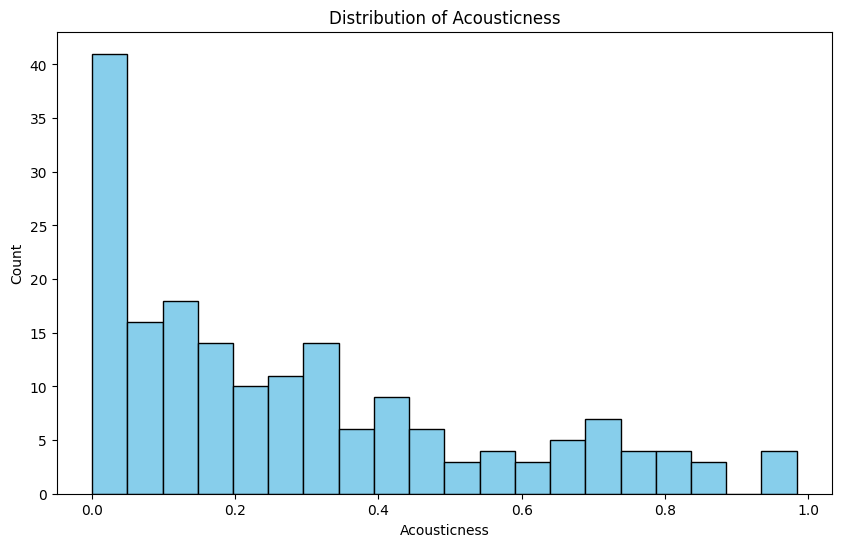

In [159]:
# Bar plot for acousticness
plt.figure(figsize=(10, 6))
plt.hist(spotify['acousticness'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Count')
plt.show()

In [160]:
# Sort the dataframe by acousticness in descending order
spotify_sorted_acousticness = spotify[spotify['acousticness'] <= 0.7]

# Display the top 20 rows
spotify_sorted_acousticness.head(20)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
15023,19mM8MZLnS27poKhi2vDhn,SwitchOTR,"Coming for You (feat. Loski, Bandokay & Izzpot...",Coming for You - Freestyle,0.66,70285.0,1,0.898,0.303,6,-6.680,1,0.403,0.2190,0.000962,0.0633,0.6800,140.230,4,chill,1.171417
15204,7dbyaRWWFvB9UG2vcwTd3J,Sainte,Local Mvp,Champagne Shots,0.71,144000.0,0,0.942,0.441,11,-11.448,1,0.469,0.4930,0.000000,0.1380,0.9250,135.028,4,chill,2.400000
15210,4Fmr4dbY1sZiX77ZbljNFC,Canking;Ess2Mad,lemme land?,lemme land?,0.69,146878.0,0,0.875,0.593,7,-10.261,0,0.394,0.1360,0.000000,0.1040,0.4660,144.028,4,chill,2.447967
15240,0W7brFokN6QtGRNp32RCQP,Arz,Alone With You,Alone With You,0.73,195200.0,1,0.768,0.374,7,-12.490,1,0.723,0.2880,0.000002,0.1110,0.3980,75.503,4,chill,3.253333
15258,1QwuUvd5IEsyLrB47jEOpB,KAVO,F My Ex,F My Ex,0.60,164595.0,1,0.894,0.435,11,-10.470,0,0.417,0.1480,0.000000,0.0736,0.7170,140.020,4,chill,2.743250
15504,6pe4kkc27IKSkubhLY7a5C,JBee,24's,24's,0.66,166027.0,1,0.540,0.538,7,-10.838,0,0.389,0.3290,0.000000,0.1060,0.6070,97.542,5,chill,2.767117
15610,43IYnqZj6slsFqPTmBNS4E,Ronzo;COMFY,Left Back (Remix),Left Back - Remix,0.65,180413.0,1,0.904,0.654,11,-9.292,1,0.345,0.4680,0.000000,0.0617,0.8050,144.966,4,chill,3.006883
15646,0wCWfjqo0FV1CDseDGD0cV,Idi Akz,Two Years Clear,Two Years Clear,0.66,205053.0,1,0.695,0.552,1,-9.271,0,0.434,0.1830,0.000000,0.1540,0.6650,142.818,4,chill,3.417550
15753,0yKiMguQ0krHIg1mnZxHaC,MKAY,Frozen Gold,Frozen Gold,0.65,138110.0,1,0.880,0.309,11,-17.457,0,0.394,0.2520,0.000000,0.0804,0.5920,139.991,4,chill,2.301833
15871,0hVvkB1j1SC9FQHShpQoYU,Alex1,Late Night Trips,Late Night Trips,0.63,97436.0,1,0.824,0.459,0,-12.061,0,0.420,0.2400,0.000001,0.1390,0.4000,137.999,4,chill,1.623933


## Instrumentalness

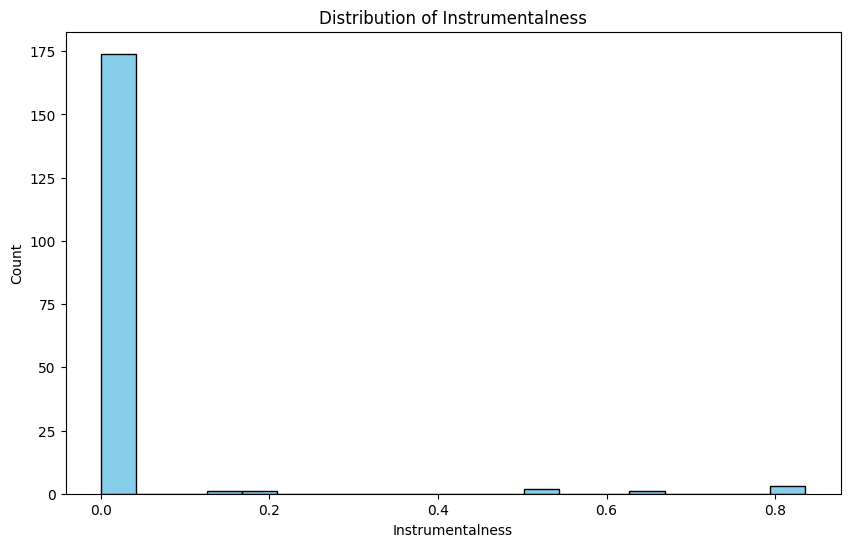

In [161]:
# Distribution plot for instrumentalness
df = spotify.copy()

plt.figure(figsize=(10, 6))
plt.hist(df['instrumentalness'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Count')
plt.show()


In [162]:
# Drop values above 0.4
#spotify = spotify[spotify['instrumentalness'] <= 0.4]
#spotify.head()

In [163]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 14941 to 109387
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   track_id          182 non-null    object  
 1   artists           182 non-null    object  
 2   album_name        182 non-null    object  
 3   track_name        182 non-null    object  
 4   popularity        182 non-null    float64 
 5   duration_ms       182 non-null    float64 
 6   explicit          182 non-null    category
 7   danceability      182 non-null    float64 
 8   energy            182 non-null    float64 
 9   key               182 non-null    int64   
 10  loudness          182 non-null    float64 
 11  mode              182 non-null    int64   
 12  speechiness       182 non-null    float64 
 13  acousticness      182 non-null    float64 
 14  instrumentalness  182 non-null    float64 
 15  liveness          182 non-null    float64 
 16  valence           1

## Genre

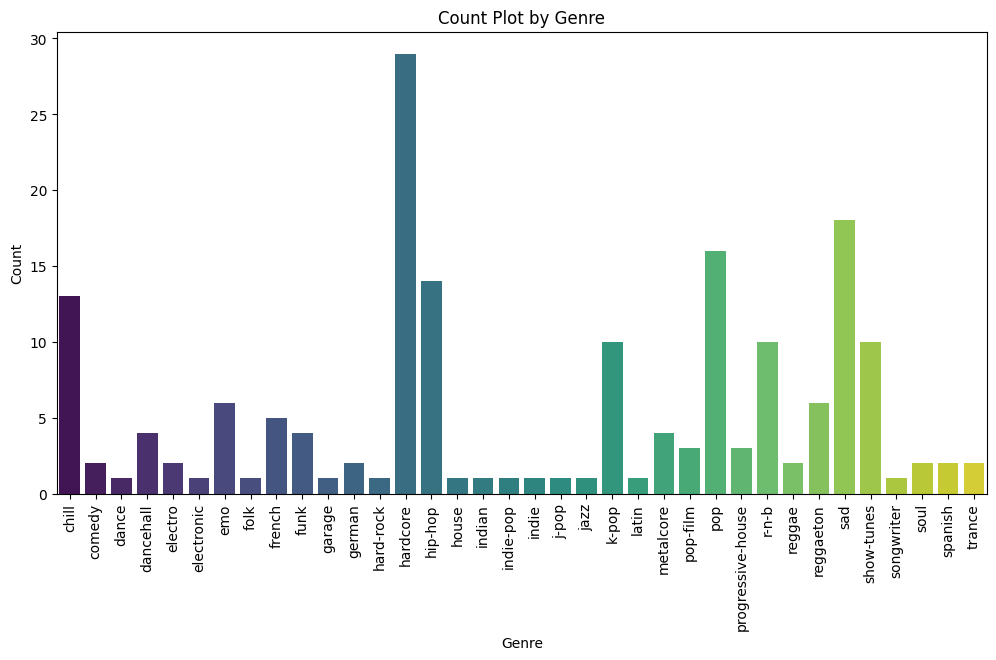

In [164]:
# Count plot by genre
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=spotify, x='track_genre', palette='viridis')
plt.title('Count Plot by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [165]:
# Drop specific genres
genres_to_drop = ['comedy','clasical', 'metal', 'metalcore', 'hardcore', 'german', 'garage', 'death-metal', 'hard-rock', 'show-tunes', 'blues', 'alternative', 'folk', 'french', 'hip-hop']
spotify = spotify[~spotify['track_genre'].isin(genres_to_drop)]
spotify.head(50)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
14941,2xhGZ3WzOa3tir28y7Cb88,Peachy!;mxmtoon,Falling for U,Falling for U,0.74,124000.0,0,0.719,0.360,6,-12.034,1,0.398,0.74800,0.000002,0.0812,0.4090,80.184,4,chill,2.066667
15023,19mM8MZLnS27poKhi2vDhn,SwitchOTR,"Coming for You (feat. Loski, Bandokay & Izzpot...",Coming for You - Freestyle,0.66,70285.0,1,0.898,0.303,6,-6.680,1,0.403,0.21900,0.000962,0.0633,0.6800,140.230,4,chill,1.171417
15204,7dbyaRWWFvB9UG2vcwTd3J,Sainte,Local Mvp,Champagne Shots,0.71,144000.0,0,0.942,0.441,11,-11.448,1,0.469,0.49300,0.000000,0.1380,0.9250,135.028,4,chill,2.400000
15210,4Fmr4dbY1sZiX77ZbljNFC,Canking;Ess2Mad,lemme land?,lemme land?,0.69,146878.0,0,0.875,0.593,7,-10.261,0,0.394,0.13600,0.000000,0.1040,0.4660,144.028,4,chill,2.447967
15240,0W7brFokN6QtGRNp32RCQP,Arz,Alone With You,Alone With You,0.73,195200.0,1,0.768,0.374,7,-12.490,1,0.723,0.28800,0.000002,0.1110,0.3980,75.503,4,chill,3.253333
15258,1QwuUvd5IEsyLrB47jEOpB,KAVO,F My Ex,F My Ex,0.60,164595.0,1,0.894,0.435,11,-10.470,0,0.417,0.14800,0.000000,0.0736,0.7170,140.020,4,chill,2.743250
15304,3Kim4tV3HTnpaELmIh56lI,JBee,Talking Stage,Talking Stage,0.66,177464.0,1,0.838,0.454,11,-10.074,0,0.350,0.73400,0.000000,0.1020,0.7600,142.114,4,chill,2.957733
15504,6pe4kkc27IKSkubhLY7a5C,JBee,24's,24's,0.66,166027.0,1,0.540,0.538,7,-10.838,0,0.389,0.32900,0.000000,0.1060,0.6070,97.542,5,chill,2.767117
15610,43IYnqZj6slsFqPTmBNS4E,Ronzo;COMFY,Left Back (Remix),Left Back - Remix,0.65,180413.0,1,0.904,0.654,11,-9.292,1,0.345,0.46800,0.000000,0.0617,0.8050,144.966,4,chill,3.006883
15646,0wCWfjqo0FV1CDseDGD0cV,Idi Akz,Two Years Clear,Two Years Clear,0.66,205053.0,1,0.695,0.552,1,-9.271,0,0.434,0.18300,0.000000,0.1540,0.6650,142.818,4,chill,3.417550


In [166]:
# Show current spotify info
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 14941 to 109387
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   track_id          113 non-null    object  
 1   artists           113 non-null    object  
 2   album_name        113 non-null    object  
 3   track_name        113 non-null    object  
 4   popularity        113 non-null    float64 
 5   duration_ms       113 non-null    float64 
 6   explicit          113 non-null    category
 7   danceability      113 non-null    float64 
 8   energy            113 non-null    float64 
 9   key               113 non-null    int64   
 10  loudness          113 non-null    float64 
 11  mode              113 non-null    int64   
 12  speechiness       113 non-null    float64 
 13  acousticness      113 non-null    float64 
 14  instrumentalness  113 non-null    float64 
 15  liveness          113 non-null    float64 
 16  valence           1